<a href="https://colab.research.google.com/github/CarolinaBortolomai/CarolinaBortolomai/blob/main/Series_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Séries Temporais**

## 1.1.Importando as bibliotecas:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1.2.Importando dataset


In [4]:
# URL do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# Importando o csv para um dataframe
df = pd.read_csv(dataset_path)

# Mostrar as 5 primeiras linhas
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
# [ANTES] converter o tipo da coluna DATE em datetime
print("[ANTES]")
display(df.DATE.head())

[ANTES]


0    01-01-1985
1    02-01-1985
2    03-01-1985
3    04-01-1985
4    05-01-1985
Name: DATE, dtype: object

In [6]:
# [DEPOIS] converter o tipo da coluna DATE em datetime
print("[DEPOIS]")
display(pd.to_datetime(df.DATE, format="%m-%d-%Y").head())

[DEPOIS]


0   1985-01-01
1   1985-02-01
2   1985-03-01
3   1985-04-01
4   1985-05-01
Name: DATE, dtype: datetime64[ns]

In [7]:
# Associando o index a data
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

# Eliminar a coluna DATE
df.drop("DATE", inplace=True, axis=1)

# Mostrar 5 primeiras linhas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# **2. Visualizar Séries Temporais**

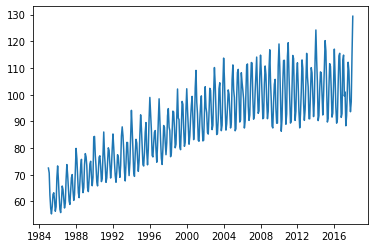

In [8]:
# Plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.Value)

# **3. Como decompor uma Série Temporal**
#### É possível decompor uma série temporal se você considerar a série como uma combinação aditiva ou multiplicativa dos seus componentes.
#### A bibliotecas STATS from statsmodels.tsa.seasonal import seasonal_decompose

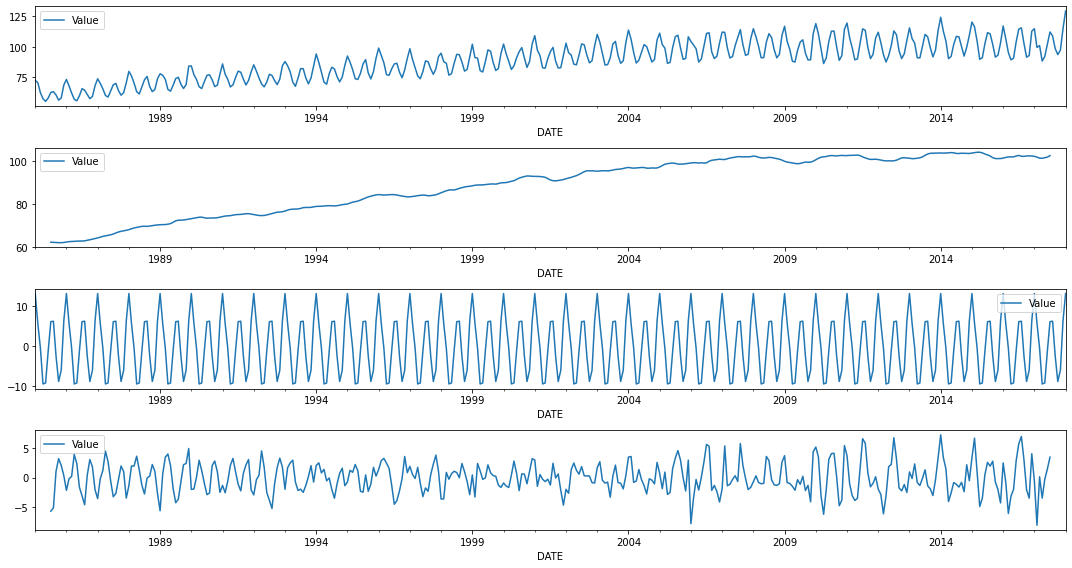

In [9]:
# Salvar a decomposição em result
result = seasonal_decompose(df)

# Plotar a decomposição
# result.plot();

# Plotar maior
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
result.observed.plot(ax = ax1)
result.trend.plot(ax = ax2)
result.seasonal.plot(ax = ax3)
result.resid.plot(ax = ax4)
plt.tight_layout()

# **4. Análise Exploratória e Extração de Features**

#### Usaremos um dataset contendo os dados de uma suposta companhia ferroviária que utiliza uma nova tecnologia de propulsão. 

In [10]:
ferroviaria_dataset = "https://github.com/carlosfab/escola-data-science/raw/master/datasets/companhia_ferroviaria/trem.csv"

# Importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

# Mostrar as 5 primeiras linhas
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [11]:
df_trem.Datetime

0        25-08-2012 00:00
1        25-08-2012 01:00
2        25-08-2012 02:00
3        25-08-2012 03:00
4        25-08-2012 04:00
               ...       
18283    25-09-2014 19:00
18284    25-09-2014 20:00
18285    25-09-2014 21:00
18286    25-09-2014 22:00
18287    25-09-2014 23:00
Name: Datetime, Length: 18288, dtype: object

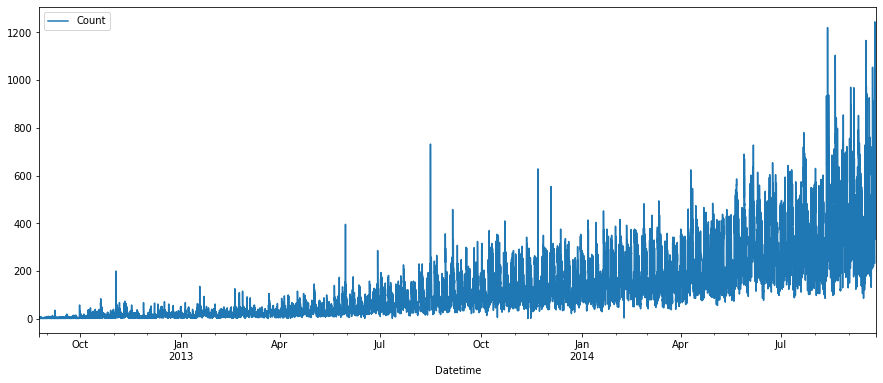

In [12]:
# Converter a coluna Datetime em tipo Datetime
df_trem["Datetime"] = pd.to_datetime(df_trem.Datetime, format="%d-%m-%Y %H:%M")

# Plotar gráfico
fig, ax = plt.subplots(figsize=(15, 6))
df_trem.plot(x = "Datetime", y = "Count", ax = ax);

## **Hipóteses:**

*   Pessoas viajam mais durante a semana.
*   Há horários de pico durante as idas e vindas do trabalho.
*   Há períodos do ano onde a demanda por transporte é maior.

In [13]:
# Criar Features para cada período
df_trem["Year"] = df_trem.Datetime.dt.year
df_trem["Month"] = df_trem.Datetime.dt.month
df_trem["Day"] = df_trem.Datetime.dt.day
df_trem["Hour"] = df_trem.Datetime.dt.hour
df_trem["Day_of_week"] = df_trem.Datetime.dt.dayofweek

# Verificar as 5 primeiras entradas
df_trem.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


*   Pessoas viajam mais durante a semana:



In [14]:
# converter as variáveis em 0 e 1:
df_trem["Weekend"] = 0
df_trem.loc[(df_trem.Day_of_week == 5) | (df_trem.Day_of_week == 6), "Weekend"] = 1

In [15]:
# Verificar os valores final de semana x semana
df_trem.Weekend.value_counts()

0    13056
1     5232
Name: Weekend, dtype: int64

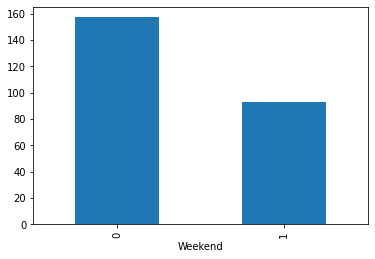

In [19]:
# Plotar os valores final de semana x semana
df_trem.groupby("Weekend").Count.mean().plot.bar();



*   Há horários de pico durante as idas e vindas do trabalho.



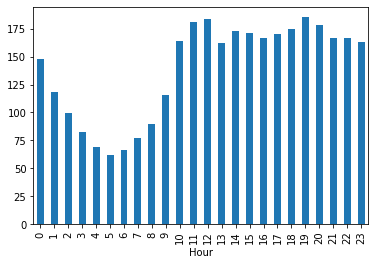

In [20]:
# Ver Count por horários
df_trem.groupby("Hour").Count.mean().plot.bar()

*   Há períodos do ano onde a demanda por transporte é maior.

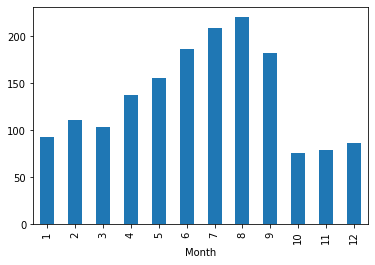

In [22]:
# Ver Count por mês
df_trem.groupby("Month").Count.mean().plot.bar()